In [0]:
# upgrade tables bo read_hdf wymaga zaraz
!pip install --upgrade tables

Requirement already up-to-date: tables in /usr/local/lib/python3.6/dist-packages (3.6.1)


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
ls "/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car"

data/  LICENSE  README.md


In [0]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car/data"

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car/data


In [0]:
ls

car.h5


In [0]:
df = pd.read_hdf('car.h5')
df.shape

(106494, 155)

In [0]:
# jakie mamy kolumny
df.columns.values

array(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       'feature_kurtyny-powietrzne', 'feature_klimatyzacja-dwustrefowa',
       'feature_światła-led', 'feature_czujnik-zmierzchu',
       'feature_elektrycznie-ustawiane-lusterka',
       'feature_asr-(kontrola-trakcji)',
       'feature_poduszka-powietrzna-kierowcy', 'feature_cd',
       'feature_elektryczne-szyby-przednie',
       'feature_poduszka-powietrzna-pasażera',
       'feature_system-start-stop', 'feature_światła-do-jazdy-dziennej',
       'feature_komputer-pokładowy', 'feature_elektryczne-szyby-tylne',
       'feature_klimatyzacja-manualna', 'feature_tapicerka-welurowa',
       'feature_czujnik-deszczu', 'feature_światła-przeciwmgielne',
       'feature_ogrzewanie-postojowe', 'feature_radio-niefabryczne',
       'feature_regulowane-zaw

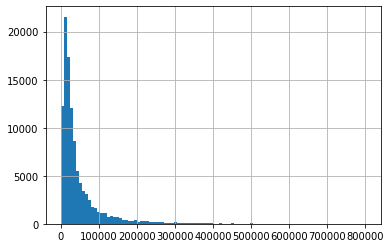

In [0]:
df['price_value'].hist(bins=100)

In [0]:
df['price_value'].max()

799900.0

In [0]:
df['price_value'].describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

In [0]:
df['price_value']

0          45100.0
2          28000.0
3         229500.0
4          19500.0
5         164900.0
            ...   
160609     17900.0
160610     22700.0
160611     15500.0
160614      6490.0
160615     11300.0
Name: price_value, Length: 106494, dtype: float64

In [0]:
df['param_marka-pojazdu'].unique()

array(['Dacia', 'Peugeot', 'Porsche', 'Volkswagen', 'Škoda', 'Jeep',
       'Renault', 'Opel', 'Volvo', 'Audi', 'BMW', 'Toyota', 'Kia',
       'Hyundai', 'Citroën', 'Nissan', 'Daewoo', 'Fiat', 'Mercedes-Benz',
       'Mini', 'Ford', 'Chevrolet', 'Infiniti', 'Suzuki', 'Lexus', 'Seat',
       'Mitsubishi', 'SsangYong', 'Mazda', 'Alfa Romeo', 'Saab', 'Dodge',
       'Jaguar', 'Honda', 'Smart', 'Land Rover', 'Chrysler',
       'Aston Martin', 'Subaru', 'Piaggio', 'Daihatsu', 'Cadillac',
       'Lada', 'Iveco', 'Lincoln', 'Inny', 'Lancia', 'Yugo', 'Pontiac',
       'MG', 'Scion', None, 'Hummer', 'Polonez', 'Maybach', 'Maserati',
       'Aixam', 'Bentley', 'Lamborghini', 'Isuzu', 'Gaz', 'Rover',
       'Wartburg', 'Mercury', 'Ferrari', 'Oldsmobile', 'Rolls-Royce',
       'Moskwicz', 'Ligier', 'Vauxhall', 'Tesla', 'Microcar', 'Acura',
       'Buick', 'Tarpan', 'Uaz', 'McLaren', 'GMC', 'Warszawa', 'Morgan',
       'Żuk', 'Tata', 'Brilliance', 'Triumph', 'Chatenet', 'Zastava',
       'Wołga', '

In [0]:
df['param_marka-pojazdu'].value_counts()

Volkswagen    11314
Opel           9773
BMW            8327
Audi           7960
Ford           7567
              ...  
Plymouth          1
Gaz               1
Maybach           1
Zaporożec         1
Moskwicz          1
Name: param_marka-pojazdu, Length: 100, dtype: int64

In [0]:
df['param_marka-pojazdu'].describe()

count         106302
unique           100
top       Volkswagen
freq           11314
Name: param_marka-pojazdu, dtype: object

In [0]:

df.groupby('param_marka-pojazdu')['price_value'].mean()

param_marka-pojazdu
Acura         32349.250000
Aixam         26129.208955
Alfa Romeo    52053.311086
Aro           20800.000000
Asia          12500.000000
                  ...     
Yugo          47500.000000
Zaporożec      3900.000000
Zastava        2999.000000
Škoda         40068.437434
Żuk            4722.500000
Name: price_value, Length: 100, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f66b6228f60>,
      dtype=object)

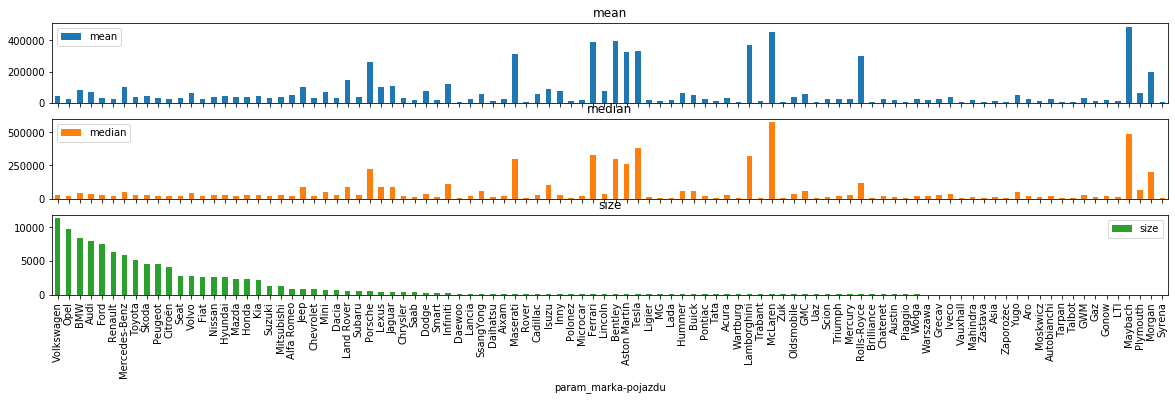

In [0]:
(
  df
  .groupby('param_marka-pojazdu')['price_value']
  #.agg(np.mean)
  #.agg(np.median)
  .agg([np.mean, np.median, np.size])
  .sort_values(by='size', ascending=False)
).plot(kind='bar', figsize=(20,5), subplots=True)


# funkcja rysująca 3 wykresy

In [0]:
def group_and_barplot(feat_groupby, feat_agg='price_value', agg_funcs=[np.mean, np.median, np.size], feat_sort='mean', ascending=False, top=50, subplots=True, ):
  return(
    df
    .groupby(feat_groupby)[feat_agg]
    .agg(agg_funcs)
    .sort_values(by=feat_sort, ascending=ascending)
    .head(top)
  ).plot(kind='bar', figsize=(20,5), subplots=subplots)


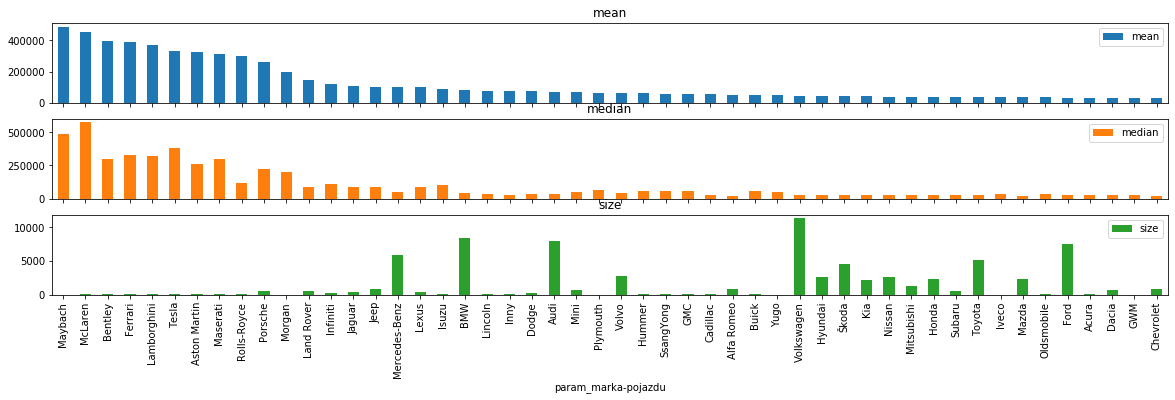

In [0]:
group_and_barplot('param_marka-pojazdu');

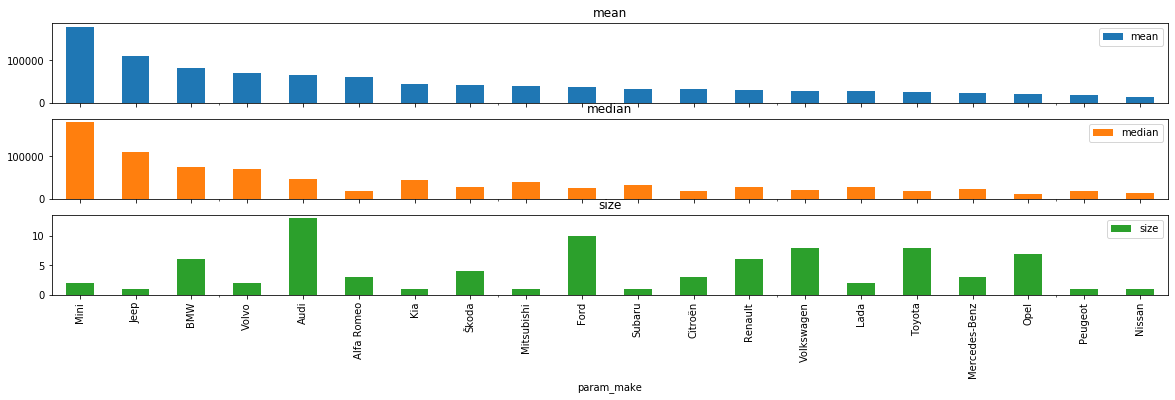

In [0]:
group_and_barplot('param_make');

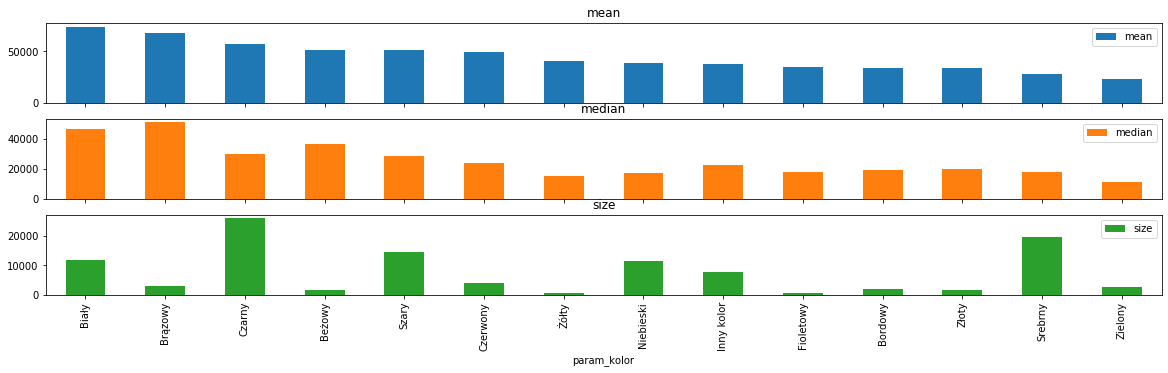

In [0]:
group_and_barplot('param_kolor');

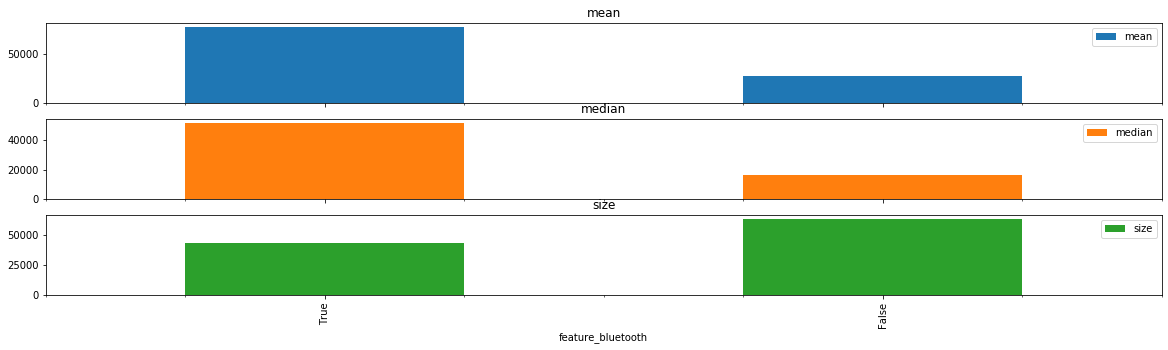

In [0]:
group_and_barplot('feature_bluetooth');

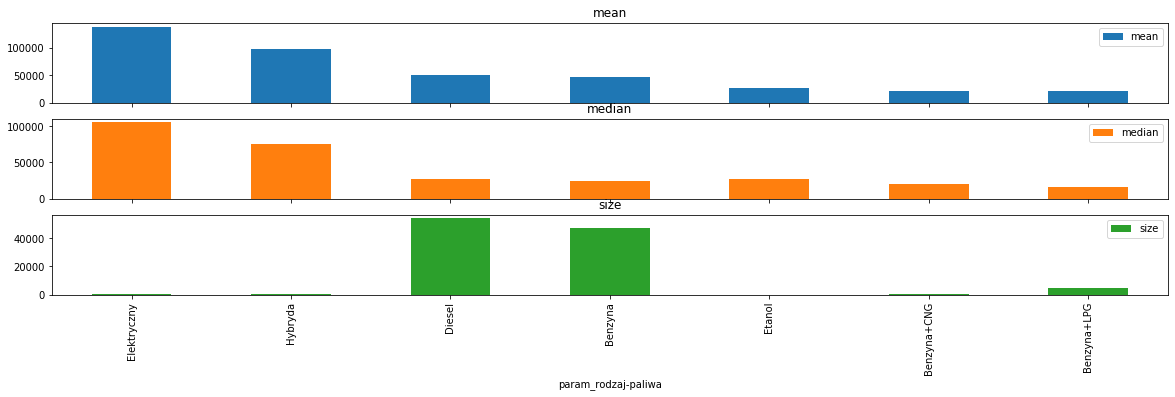

In [0]:
group_and_barplot('param_rodzaj-paliwa');

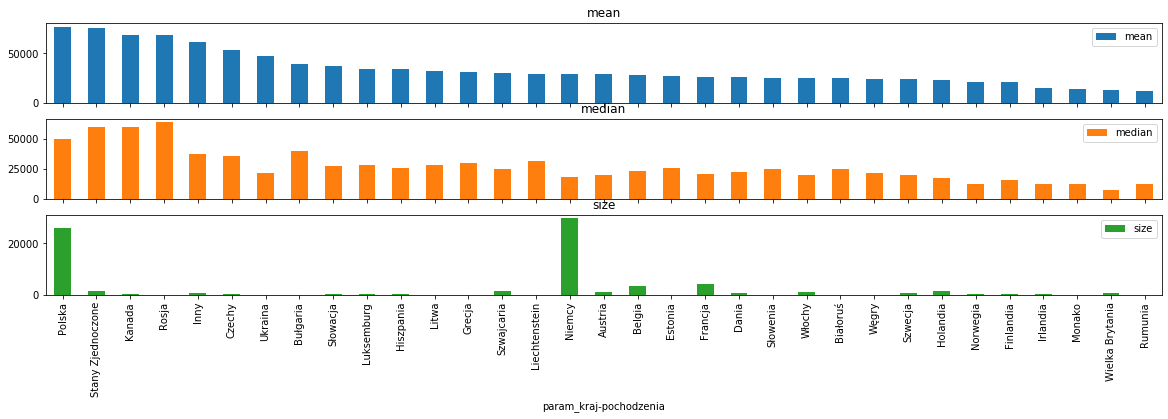

In [0]:
group_and_barplot('param_kraj-pochodzenia');

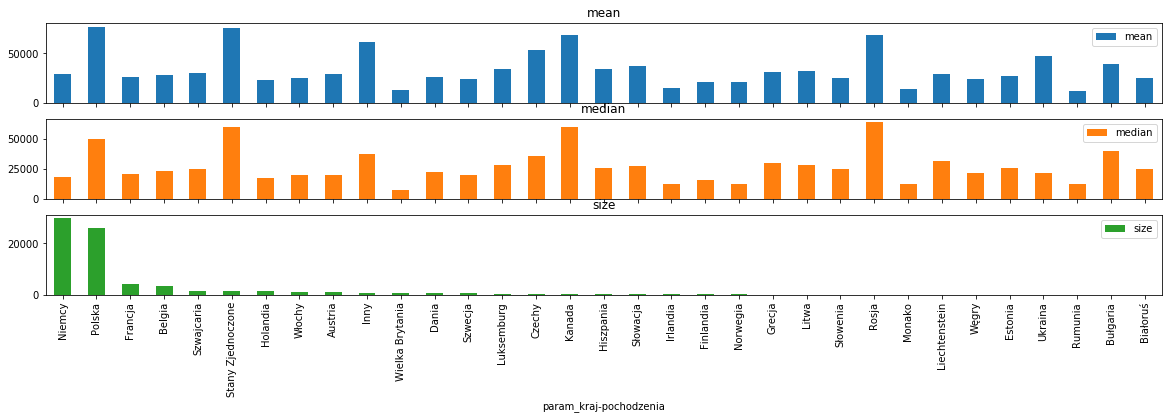

In [0]:
group_and_barplot('param_kraj-pochodzenia',feat_sort='size');

In [0]:
df['param_kraj-pochodzenia'].count()

72392

In [0]:
df[df['param_kraj-pochodzenia'].isna()].head()

,breadcrumb,created_at,price_currency,price_details,price_value,seller_address,seller_name,seller_type,feature_czujniki-parkowania-przednie,feature_poduszka-powietrzna-chroniąca-kolana,feature_kurtyny-powietrzne,feature_klimatyzacja-dwustrefowa,feature_światła-led,feature_czujnik-zmierzchu,feature_elektrycznie-ustawiane-lusterka,feature_asr-(kontrola-trakcji),feature_poduszka-powietrzna-kierowcy,feature_cd,feature_elektryczne-szyby-przednie,feature_poduszka-powietrzna-pasażera,feature_system-start-stop,feature_światła-do-jazdy-dziennej,feature_komputer-pokładowy,feature_elektryczne-szyby-tylne,feature_klimatyzacja-manualna,feature_tapicerka-welurowa,feature_czujnik-deszczu,feature_światła-przeciwmgielne,feature_ogrzewanie-postojowe,feature_radio-niefabryczne,feature_regulowane-zawieszenie,feature_ogranicznik-prędkości,feature_zmieniarka-cd,feature_szyberdach,feature_isofix,feature_asystent-pasa-ruchu,feature_alufelgi,feature_bluetooth,feature_nawigacja-gps,feature_asystent-parkowania,...,param_particle-filter,param_zarejestrowany-w-polsce,param_oferta-od,param_moc,param_make,param_kraj-pochodzenia,param_engine-power,param_year,param_serwisowany-w-aso,param_rodzaj-paliwa,param_możliwość-finansowania,param_registered-in-poland,param_transmission,param_miesięczna-rata,param_kod-silnika,param_version,param_opłata-początkowa,param_model-pojazdu,param_pojemność-skokowa,param_kierownica-po-prawej-(anglik),param_fuel-type,param_vat-free,param_acrylic,param_damaged,param_door-count,param_tuning,param_filtr-cząstek-stałych,param_nr-of-seats,param_kolor,param_engine-capacity,param_pearl,param_stan,param_wersja,param_emisja-co2,param_body-type,param_matowy,param_bezwypadkowy,param_akryl-(niemetalizowany),param_monthly-payment-value,car_id
0,"[Osobowe, Dacia, Logan, Dacia Logan II (2012-)]","13:23, 5 marca 2018",PLN,Cena Brutto,45100.0,"Krasne 7A - 36-007 Krasne, rzeszowski, Podkarp...",AUTO SPEKTRUM,Dealer,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,...,None,None,Firmy,90 KM,None,None,None,None,None,Benzyna+LPG,None,None,None,None,None,None,None,Logan,898 cm3,None,None,None,None,None,None,None,None,None,Inny kolor,None,None,Nowe,II (2012-),None,None,None,Tak,None,None,0
7,"[Osobowe, Jeep, Compass]","17:15, 4 marca 2018",PLN,"Cena Brutto, Faktura VAT",124380.0,"Mełgiewska 10 - 20-209 Lublin, Lubelskie (Polska)",Fix Forum Lider Sp. z o.o.,Dealer,False,False,True,False,True,False,True,True,True,False,True,True,True,True,True,True,True,True,False,True,False,False,False,False,False,False,True,False,True,True,False,False,...,None,None,Firmy,140 KM,None,None,None,None,None,Diesel,Tak,None,None,None,None,None,None,Compass,1 368 cm3,None,None,None,None,None,None,None,None,None,Biały,None,None,Nowe,None,None,None,None,Tak,None,None,7
24,"[Osobowe, Audi, A6, Audi A6 C6 (2004-2011)]","07:58, 4 marca 2018",PLN,Cena Brutto,29900.0,"GROTA ROWECKIEGO 10 - 30-348 Kraków, Łagiewnik...",F.H. AUTO HIT Tomasz Wójcikiewicz,Dealer,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,None,None,Firmy,224 KM,None,None,None,None,Tak,Diesel,None,None,None,None,None,None,None,A6,2 967 cm3,None,None,None,None,None,None,None,None,None,Srebrny,None,None,Używane,C6 (2004-2011),None,None,None,Tak,None,None,24
32,"[Osobowe, Škoda, Superb, Škoda Superb II (2008-)]","16:58, 28 lutego 2018",PLN,Cena Brutto,32900.0,"ul.Poznańska 117b - 63-800 Gostyń, gostyński, ...",ALMAR-I,Dealer,False,False,False,False,False,False,True,True,True,True,True,True,False,False,True,True,True,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False,...,None,None,Firmy,105 KM,None,None,None,None,None,Diesel,Tak,None,None,None,None,None,None,Superb,1 896 cm3,None,None,None,None,None,None,Non

In [0]:
df.count()

breadcrumb                       106494
created_at                       106385
price_currency                   106494
price_details                    106494
price_value                      106494
                                  ...  
param_matowy                        319
param_bezwypadkowy                66723
param_akryl-(niemetalizowany)      4176
param_monthly-payment-value           1
car_id                           106494
Length: 155, dtype: int64

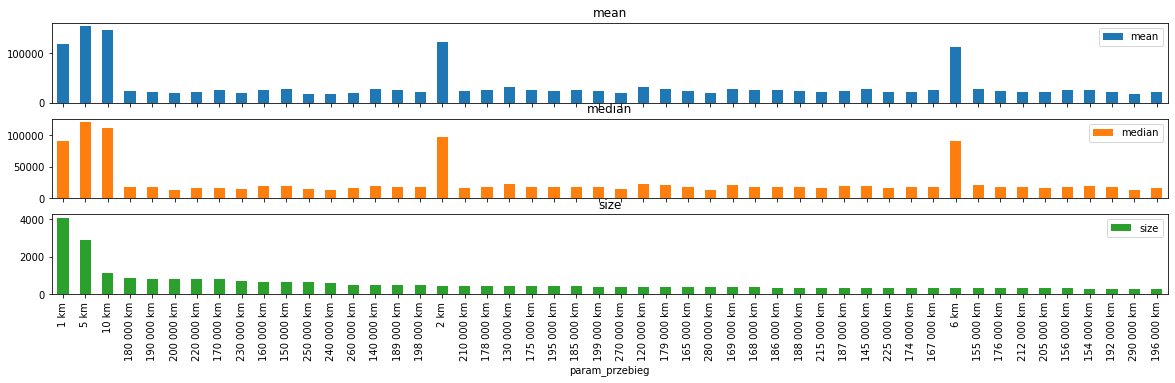

In [0]:
group_and_barplot('param_przebieg', feat_sort='size');

In [0]:
df.param_przebieg.count()

106057

In [0]:
df['param_przebieg_int'] = df['param_przebieg'].map(lambda x: int(str(x).replace("km","").replace(" ", "")) if x else 0).astype(int)

In [0]:
df.param_przebieg_int.value_counts()

1         4047
5         2889
10        1123
180000     878
190000     841
          ... 
95750        1
329224       1
77325        1
212495       1
75707        1
Name: param_przebieg_int, Length: 23954, dtype: int64

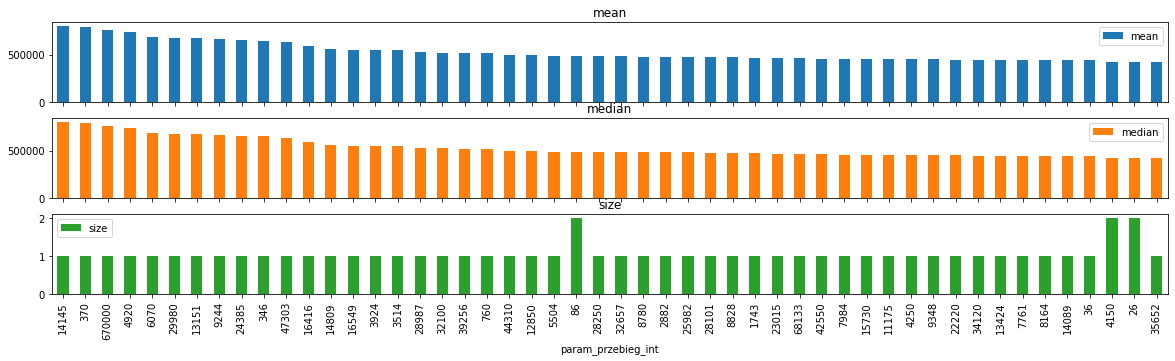

In [0]:
group_and_barplot('param_przebieg_int');

In [0]:
df.param_przebieg_int.describe()

count    1.064940e+05
mean     1.440999e+05
std      1.312748e+05
min      0.000000e+00
25%      6.700000e+04
50%      1.540000e+05
75%      2.050000e+05
max      1.460069e+07
Name: param_przebieg_int, dtype: float64

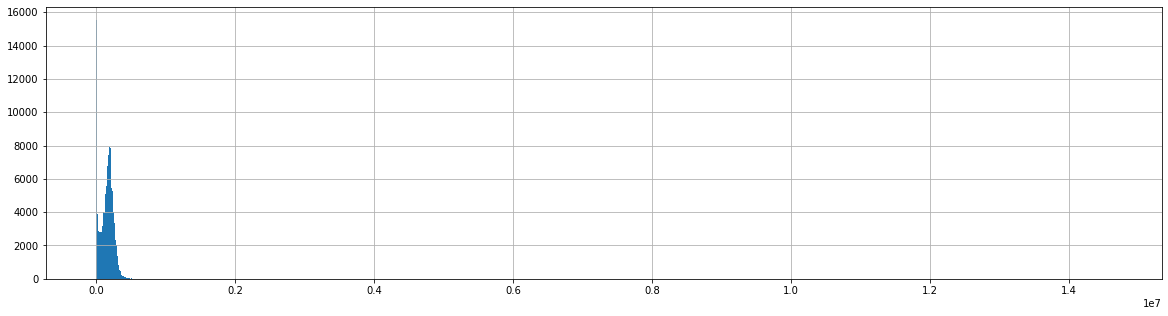

In [0]:
df.param_przebieg_int.hist(bins=1000, figsize=(20,5));

In [0]:
df['param_przebieg_bins'] = pd.qcut(df['param_przebieg_int'],20).map(lambda x: x.right)

In [0]:
df['param_przebieg_bins'].value_counts()

5.00           8185
205000.00      5585
185000.00      5490
154000.00      5453
234000.00      5427
16000.00       5408
67000.00       5373
127568.20      5325
14600690.00    5325
141268.65      5324
91000.00       5321
253000.00      5289
175000.00      5285
110593.40      5280
165000.00      5270
284517.20      5258
38751.60       5241
194774.30      5126
219243.40      5064
130.90         2465
Name: param_przebieg_bins, dtype: int64

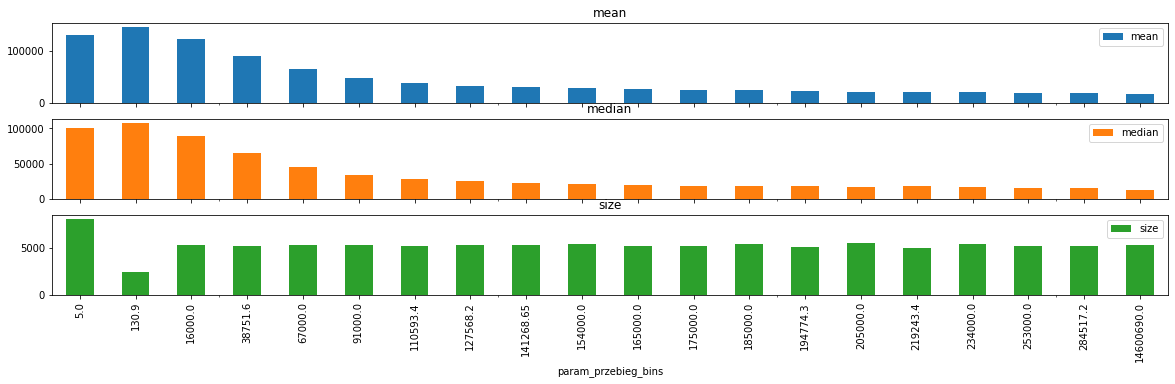

In [0]:
group_and_barplot('param_przebieg_bins', feat_sort='param_przebieg_bins', ascending=True);